In [28]:
import POMDPs, POMDPTools
using POMDPs
using POMDPTools, POMDPFiles
using Plots, Memoization, LRUCache
include("BIB.jl")
using .BIB
using Statistics, POMDPModels

##################################################################
#                          Solvers 
##################################################################

cs = palette(:Dark2_3)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-03
Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-03


In [21]:
##################################################################
#                         All Computation Times 
##################################################################




@memoize LRU(maxsize=100) function get_data(env, solvers, solverargs)
    ubs, lbs, ts = [], [], []
    for (solver_idx, (solver, solverarg)) in enumerate(zip(solvers, solverargs))
        solver = solver(;solverarg.sargs...)
        policy, info = POMDPTools.solve_info(solver, env; solverarg.pargs...)
        push!(ubs, info.ubs)
        push!(lbs, info.lbs)
        push!(ts, info.times)
    end
    return ubs, lbs, ts
end

get_data (generic function with 1 method)

### Plotting Models:

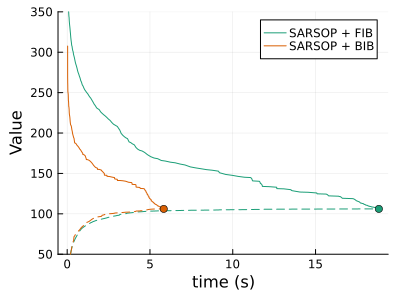

In [57]:
# Tiger

solver_idxs = [1,2]
env_idx = 2

ubs, lbs, ts = get_data(envs[env_idx], solvers[solver_idxs], solverargs[solver_idxs])

plot()
plot!(size=(400,300))
for solver_idx in solver_idxs
    plot!(ts[solver_idx], ubs[solver_idx], label="$(solverargs[solver_idx].name)", color=cs[solver_idx])
    plot!(ts[solver_idx], lbs[solver_idx], label=nothing, color=cs[solver_idx], ls=:dash)
    plot!([last(ts[solver_idx])], [last(lbs[solver_idx])], seriestype=:scatter, label=nothing, color=cs[solver_idx])
end

# title!("$(envargs[env_idx].name) Environment")
xlabel!("time (s)")
ylabel!("Value")
ylims!(50,350)

savefig("SarsopBounds_Tiger.pdf")
plot!()

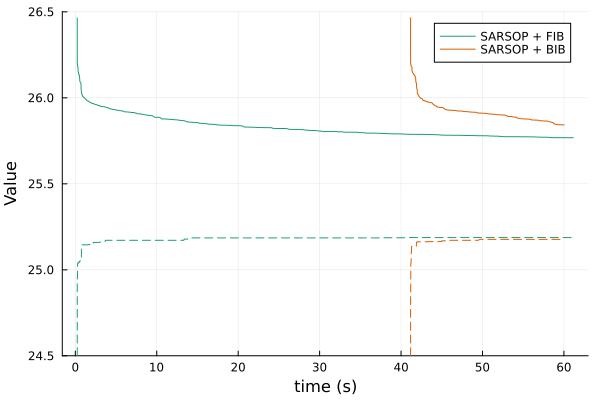

In [64]:
# RockSample (10)

solver_idxs = [1,2]
env_idx = 4

ubs, lbs, ts = get_data(envs[env_idx], solvers[solver_idxs], solverargs[solver_idxs])

plot()
for solver_idx in solver_idxs
    plot!(ts[solver_idx], ubs[solver_idx], label="$(solverargs[solver_idx].name)", color=cs[solver_idx])
    plot!(ts[solver_idx], lbs[solver_idx], label=nothing, color=cs[solver_idx], ls=:dash)
end

# title!("$(envargs[env_idx].name) Environment")
xlabel!("time (s)")
ylabel!("Value")
ylims!(24.5,26.5)
plot!()

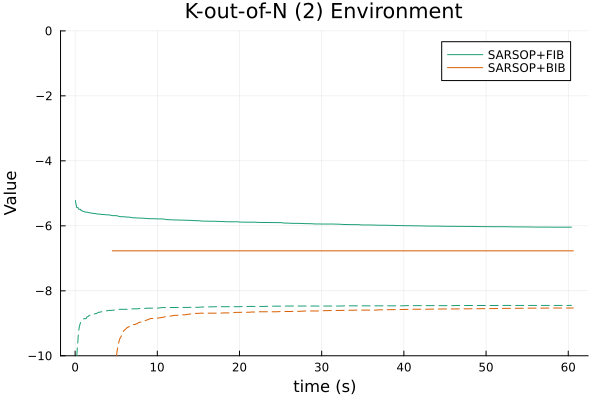

In [58]:
# K-out-of-N (2)

solver_idxs = [1,2]
env_idx = 2

ubs, lbs, ts = get_data(envs[env_idx], solvers[solver_idxs], solverargs[solver_idxs])

plot()
for solver_idx in solver_idxs
    plot!(ts[solver_idx], ubs[solver_idx], label="$(solverargs[solver_idx].name)", color=cs[solver_idx])
    plot!(ts[solver_idx], lbs[solver_idx], label=nothing, color=cs[solver_idx], ls=:dash)
end

title!("$(envargs[env_idx].name) Environment")
xlabel!("time (s)")
ylabel!("Value")
ylims!(-10,0)
plot!()

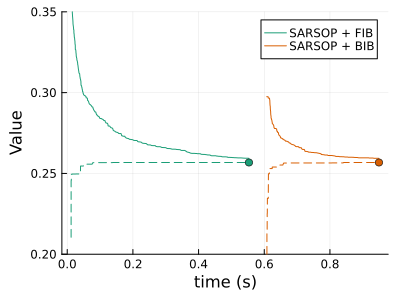

In [58]:
# Frozen Lake (5)

solver_idxs = [1,2]
env_idx = 7

ubs, lbs, ts = get_data(envs[env_idx], solvers[solver_idxs], solverargs[solver_idxs])

plot()
plot!(size=(400,300))
for solver_idx in solver_idxs
    plot!(ts[solver_idx], ubs[solver_idx], label="$(solverargs[solver_idx].name)", color=cs[solver_idx])
    plot!(ts[solver_idx], lbs[solver_idx], label=nothing, color=cs[solver_idx], ls=:dash)
    plot!([last(ts[solver_idx])], [last(lbs[solver_idx])], seriestype=:scatter, label=nothing, color=cs[solver_idx])
end

# title!("$(envargs[env_idx].name) Environment")
xlabel!("time (s)")
ylabel!("Value")
ylims!(0.2,0.35)
savefig("SarsopBounds_FrozenLake.pdf")
plot!()